## Chapter 7

https://shimo.im/docs/he8gCdhmeK0a4y5Y

### 贝叶斯决策论

**贝叶斯决策考虑如何基于概率和误判损失来选择最优的类别标记。**

*条件风险*: N种类别标签，将$c_j$错分到$c_i$产生的损失记为$\lambda_{ij}$, 后验概率$P(c_i|x)$指基于样本分为类$c_i$的概率，则

$$R(c_i|x)=\sum_{j=1}^N \lambda_{ij}P(c_j|x)$$

*总体风险*，某判定准则$h$的总体风险：

$$R(h)=E_x[R(h(x)|x)]$$

显然，当对每个样本，某准则h能够使条件风险最小，则总体风险也将被最小化。**贝叶斯判定准则**：为最小化总体风险，只需在每个样本上选择那个能使条件风险$R(c|x)$最小的类别标记，即

$$h^*=\arg \min_c R(c|x)$$

此时,$h^*$称为贝叶斯最优分类器，与贝叶斯风险$R(h^*)$相对，$1-R(h^*)$反应了分类器能达到的最好性能（理论上限）。

若目标是最小化分类错误率，则误判损失函数$\lambda_{ij}=I(i\neq j)$,此时条件风险$R(c|x)=1-P(c|x)$,故最优贝叶斯分类器转化为

$$h^*=\arg\max_c P(c|x)$$.

以上问题，重点是求出后验概率。大体两种策略：**判别模型**，直接建模后验概率预测类别，如决策树、BP神经网络、SVM等；**生成模型**，对联合分布建模后获得后验。 其使用贝叶斯定理，给定先验概率prior$P(c)$，以及对应的样本在给定类别下的条件概率$P(x|c)$，亦称为似然likelihood；对于分母部分是归一化因子，也称证据evidence,此与类别无关。

$$P(c|x) =\frac{P(c)P(x|c)}{P(x)}$$

先验概率可以通过样本频率进行估计，并在大数定律下，其逼近真值即$P(c)=\frac{|D_c|}{|D|}$。对于似然，因为样本空间的可能性较多，用频率估计是不可行的。

### 极大似然估计

所以一般通过训练数据进行极大似然估计，也即估计参数使得$P(x|\theta_c)$极大。
- **频率学派Frequentist**,认为参数客观存在且固定，优化似然函数即可求MLE；
- **贝叶斯学派Bayesian**，认为参数未知为随机变量，给定先验分布后求其后验分布。

定义对数似然(因为连乘会溢出)，极大化求$\hat\theta_c =\arg\max_{\theta_c} LL(\theta)$

$$LL(\theta)=\log P(D_c|\theta_c) = \sum_{x\in D_c} \log P(x|\theta_c)$$

可以看出，该估计的准确性依赖于分布的假设，现实中往往需要根据经验选择接近真实的分布进行估计。

### 朴素贝叶斯分类器

在后验概率的推导中，或是极大似然估计中，P(x|c)是所有属性的联合概率，当x维度d很高时，很难用有限的样本训练得好的估计。

- **朴素贝叶斯分类器**naive Bayes classifer，采用*属性条件独立性假设*，即在任意类别下，各个属性相互独立。

$$P(c|x) =\frac{P(c)P(x|c)}{P(x)} = \frac{P(c)}{P(x)} \prod_{i=1}^d P(x_i|c)$$

则对于离散属性，c类中属性取值$x_i$的集合为$D_{c,x_i}$,则同样的用频率估计该值的条件概率$P(x_i|c)=\frac{|D_{c,x_i}|}{D_c|}$;对于连续则可以假定$p(x_i|c)\sim N(\mu_{c,i}, \sigma_{c,i})$.

为了避免在某个属性上确实某一个类别而导致连乘中出现0概率而无意义的情况，也即避免其他属性的信息被为出现的属性值抹去，需要对该概率进行平滑处理，常用**拉普拉斯修正Laplacian correction**，他不仅修正0，而且随着训练集的增大，修正过程引入的先验的影响也可以忽略。

$$P(c)=\frac{|D_c|+1}{|D|+N},\qquad P(x_i|c)=\frac{D_{c,x_i}+1}{|D_c|+N_i}$$

多种应用形式：

- 要求预测速度快，则可以给定训练的情况下，事先估计好并存储各个条件概率后查表即可
- 任务数据更替频繁，可用**懒惰学习**，收到预测请求在进行概率估计，并在原模型上仅对新增样本的属性所涉及的概率估计进行修正事先增量学习。

### 半朴素贝叶斯分类器

对于朴素贝叶斯的属性条件独立假设，实际中往往不会满足；适当考虑一部分属性间的比较强的相互依赖关系，使介于完全联合概率与朴素思想之间。

**独依赖估计**One-Dependent Estimator，ODE，一种半朴素贝叶斯常用策略，假设每个属性在类别之外仅依赖一个其他属性，其中$pa_i$称为$x_i$的父属性，问题的关键则是确定该属性。

$$P(c|x) \propto P(c)\prod_{i=1}^d P(x_i|c_i, pa_i)$$

**Super-Parent， SPODE**，最直接的做法，所有的属性依赖都一样，称为**超父**，并采用交叉验证进行选择。另外Friedman提出Tree Augmented naive Bayes **TAN**，在最大带权生成树上选择，且其基于属性间的条件互信息构建。

<img src='https://github.com/ZRChao/Book-reading/blob/master/周志华西瓜书/figures/7_1.png?raw=true' width=500 align='center'>

**Averaged ODE, AODE**，基于集成学习的独依赖分类器。将每个属性最为超父构建SPODE，然后将具有足够数据训练的集成起来。容易看出AODE与朴素贝叶斯类似，也是计数过程。

<img src='https://github.com/ZRChao/Book-reading/blob/master/周志华西瓜书/figures/7_23.png?raw=true' width=500 align='center'>

能否考虑更高阶的属性依赖关系？将ODE拓展为kDE，随着k的增加，准确估计条件概率所需要的样本将以指数级增长。

### 贝叶斯网 Bayesian Network

亦称信念网belief network，借助有向无环图Directed Acyclic Graph DAG，刻画属性的依赖关系，并使用条件概率表Conditional Probability Table CPT，来描述属性的联合概率分布。

#### 结构

假设属性$x_i$在G中父节点集合$\pi_i$，条件概率表$\theta_{x_i|\theta_i} = P_B(x_i|\pi_i)$,则

$$P_B(x_1,\dots,x_d)=\prod_{i=1}^d P_B(x_i|\pi_i) = \prod_{i=1}^d \theta_{x_i|\pi_i}$$

<img src='https://github.com/ZRChao/Book-reading/blob/master/周志华西瓜书/figures/7_2.png?raw=true' width=600 align='center'>
<img src='https://github.com/ZRChao/Book-reading/blob/master/周志华西瓜书/figures/7_2_1.png?raw=true' width=500 align='center'>

典型的依赖关系:

<img src='https://github.com/ZRChao/Book-reading/blob/master/周志华西瓜书/figures/7_3.png?raw=true' width=600 align='center'>

为了分析有向图中的条件独立性，采用有向分离策略，产生无向的道德图来确定：

- 找出有向图的所有V型结构，并连接V型结构的父节点(道德化)
- 将所有有向边改为无向；

<img src='https://github.com/ZRChao/Book-reading/blob/master/周志华西瓜书/figures/7_4.png?raw=true' width=600 align='center'>

#### 学习

若网络结构已知，则计数即可；未知时，则需要选出恰当的网络。

**评分搜索**：定义评分函数来评估网络与数据的契合程度，并进行最优化。

评分函数一般基于信息论准备，将学习问题看成数据压缩任务，希望找到一个能以最短编码长度描述训练数据的模型--**最小描述长度准则**，Minimal Description Length MDL，选择综合编码长度（描述网络和编码数据）最短的贝叶斯网络。

定义得分函数，|B|为参数个数，f指描述每个参数所需字节数，后一项是对数似然函数：

$$s(B|D) = f(\theta)|B| - LL(B|D),\qquad LL(B|D)=\sum_i \log P_B(x_i)$$

故问题转化为优化问题，当$f=1$，则对应AIC；当$f=\frac{1}{2}\log m$，则BIC；当$f=0$,则退化为MLE。

对应所有可能的网络空间搜索将是NP问题：一是**贪心算法**，从某结构出发，每次调整一边，直到评分函数不在降低；二是**削减搜索空间**，通过施加约束，例如限定网络结构为树形结构。


#### 推断

通过后验概率进行推断，但是精确推断被证明是NP难问题，现实中更多用近似推断，如**吉布斯采样 Gibbs sampling**。（证据E，推断Q）则取与E一样的随机样本为初始值，对非证据变量进行逐个采样改变取值，采样概率根据贝叶斯网络B和其他变量当前取值获得，不断从当前产生下一个。经过T次采样后，得到与Q一致的样本个数$n_q$，则近似估计后验概率$P(Q|E)\simeq \frac{n_q}{T}$.

<img src='https://github.com/ZRChao/Book-reading/blob/master/周志华西瓜书/figures/7_5.png?raw=true' width=600 align='center'>

其属于马尔科夫链，每一步仅依赖于前一步的状态，是在联合状态孔家与证据空间的**随机漫步**。根据马尔科夫，无论初始状态如何，最终会收敛到一个平稳分布，对于吉布斯而言，该分布恰好是后验概率分布。但是其收敛速度慢，且如果出现极端概率0或1，则不能保证平稳分布的存在。

### EM算法

在隐变量Z存在的情况下，无法直接求解MLE，此时通过Z计算期望（E步），从而佳大化观测数据的对数边际似然求解（M步）。事实上，隐变量估计可以通过梯度下降求解，但是求和的项数随着隐变量的增加而指数增长，而EM可看做非梯度优化。

<img src='https://github.com/ZRChao/Book-reading/blob/master/周志华西瓜书/figures/7_36.png?raw=true' width=600 align='center'>

推荐阅读 
1. http://www.huaxiaozhuan.com/统计学习/chapters/13_EM.html
2. https://mp.weixin.qq.com/s/scx4Rrzyt_Z4kI24A2quzQ

### 阅读材料

In [2]:
# Author: Ron Weiss <ronweiss@gmail.com>, Gael Varoquaux
# Modified by Thierry Guillemot <thierry.guillemot.work@gmail.com>
# License: BSD 3 clause

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

print(__doc__)

colors = ['navy', 'turquoise', 'darkorange']

def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

iris = datasets.load_iris()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))


X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)

Automatically created module for IPython interactive environment


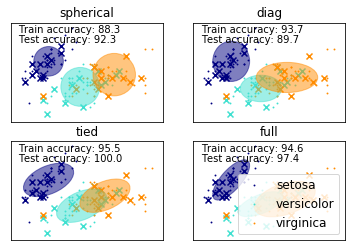

In [3]:
for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))

plt.show()